# Sentiment analysis with the perceptron algorithm

### Importing the necessary packages

In [2]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/perceptron_algorithm

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 350, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 350 (delta 54), reused 3 (delta 1), pack-reused 252 (from 1)
Receiving objects: 100% (350/350), 42.64 MiB | 26.13 MiB/s, done.
Resolving deltas: 100% (177/177), done.
/content/machine_learning_1/perceptron_algorithm


In [3]:
# Importing packages
from matplotlib import pyplot as plt
import numpy as np
import random
import utils

### Defining and plotting our dataset

In [4]:
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
labels = np.array([0,0,0,0,1,1,1,1])

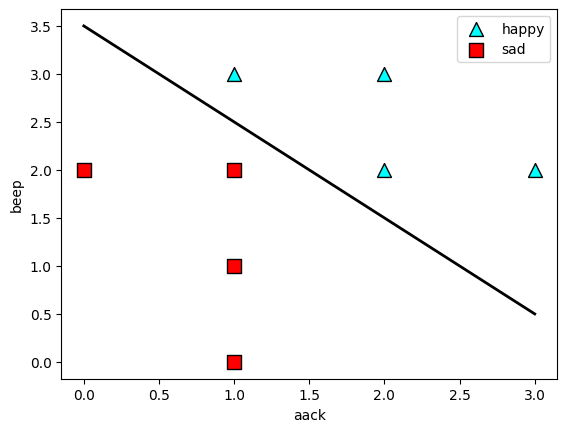

In [5]:
# Plotting the points
utils.plot_points(features, labels)

# Uncomment the following line to see a good line fit for this data.
utils.draw_line(1,1,-3.5)

### Coding the perceptron trick

In [20]:
def step(x):
    ## TODO ##
    # implement step function
    if x>=0:
      output=1
    else :
      output=0
    return output

def score(weights, bias, features):
    ## TODO ##
    # implement score calculation
    output=features@weights+bias  #features=[1,2] (1,2) --T-->(2,1), weights=[.1,.2] (1,2)
    return output

def prediction(weights, bias, features):
    ## TODO ##
    # implement prediction calculation using step and score functions
    output=step(score(weights,bias,features))
    return output

def error(weights, bias, features, label):
    ## TODO ##
    # implement error calculation using prediction and score functions
    pred=prediction(weights,bias,features)
    if pred==label:
      output= 0
    else :
      output=np.abs(score(weights,bias,features))
    return output

def mean_perceptron_error(weights, bias, features, labels):
    total_error = 0
    for i in range(len(features)):
        total_error += error(weights, bias, features[i], labels[i])
    return total_error/len(features)



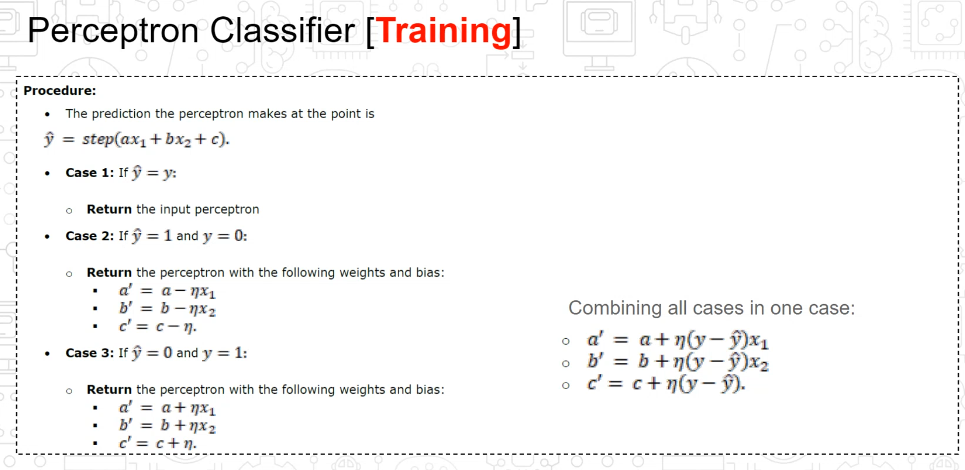

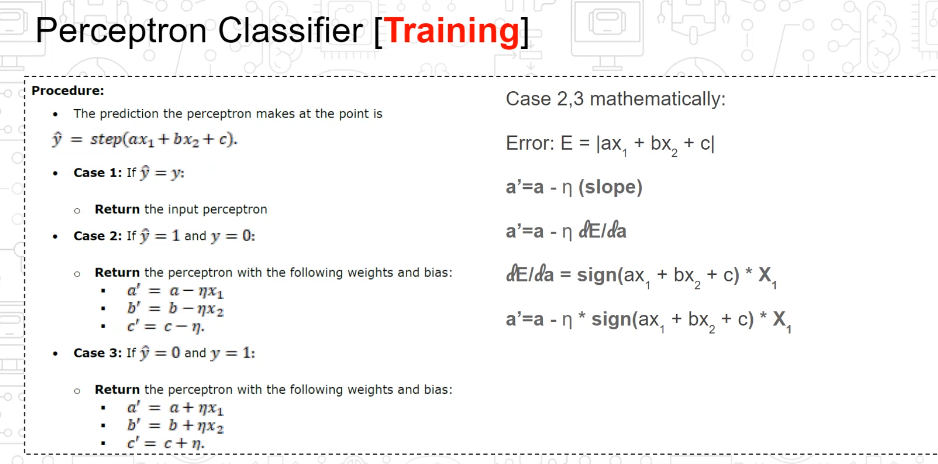

In [25]:
def perceptron_trick(weights, bias, features, label, learning_rate = 0.01):
    ## TODO ##
    # update the weights and bias using a single data sample
    pred=prediction(weights,bias,features)
    for i in range(len(weights)):
      weights[i]+=learning_rate*(label-pred)*features[i]
    bias+=learning_rate*(label-pred)

    return weights, bias


### Running the perceptron algorithm

In [30]:
random.seed(0)
def perceptron_algorithm(features, labels, learning_rate = 0.01, epochs = 200):
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    ## TODO ##
    # for this number of epochs
    # get a random datasample of our dataset(x,y)
    # using the selected datasample use perceptron_trick update weights and bias
    for epoch in range(epochs):
      # Coment the following line to draw only the final classifier
      utils.draw_line(weights[0], weights[1], bias, color='grey', linewidth=1.0, linestyle='dotted')
      i = random.randint(0, len(features)-1)
      err=mean_perceptron_error(weights,bias,features,labels)
      errors.append(err)
      wight,bias=perceptron_trick( weights,bias, features[i], labels[i], learning_rate =learning_rate)


    utils.draw_line(weights[0], weights[1], bias)
    utils.plot_points(features, labels)
    plt.ylim([-2, 5])
    plt.show()
    plt.scatter(range(epochs), errors)
    return weights, bias

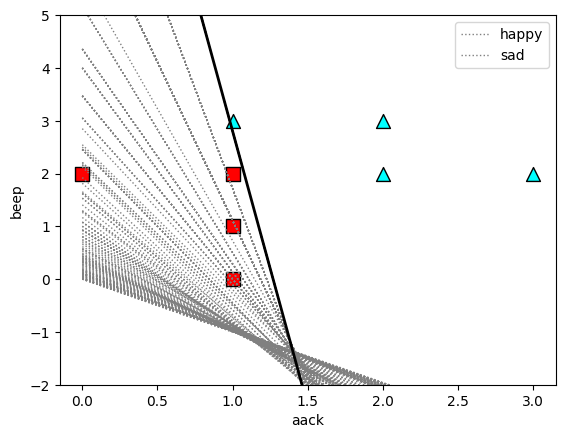

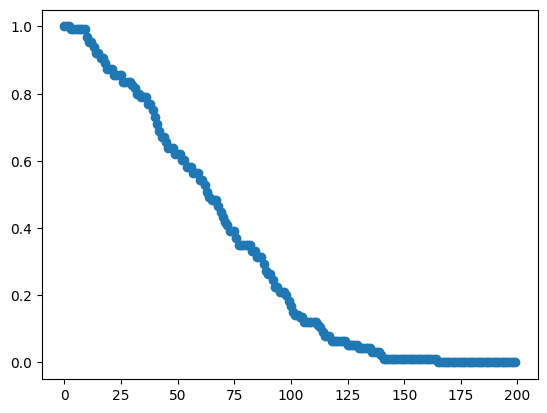

In [31]:
wight,bias=perceptron_algorithm(features, labels)

### The perceptron algorithm using SKlearn

In [34]:
from sklearn.linear_model import SGDClassifier
## TODO ##
# choose loss to be "perceptron" and tol = None
clf=SGDClassifier(loss='perceptron',tol=None)
clf.fit(features,labels)

SGDClassifier(loss='perceptron', tol=None)

In [36]:
clf.score(features, labels)

1.0

In [38]:
weights = clf.coef_
weights

array([[15.55728414, 17.77975331]])

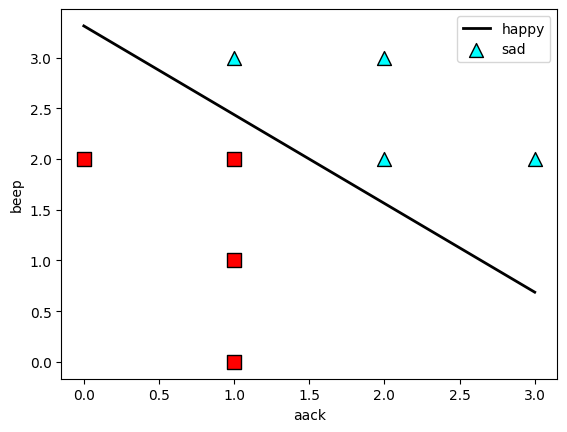

In [37]:
weights = clf.coef_
bias = clf.intercept_
utils.draw_line(weights[0][0], weights[0][1], bias)
utils.plot_points(features, labels)
plt.show()